In [1]:
import pandas as pd 
import numpy as np

In [15]:
column_names = ['user_id','product_id','rating','timestamp']
df = pd.read_csv(r"E:\e-comm recommendation system\ratings_Electronics.csv",names=column_names,nrows=200000)

In [16]:
print("shape of dataset: ",df.shape)
print("first few rows: ")
df.head()

shape of dataset:  (200000, 4)
first few rows: 


,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [19]:
# checking the missing values 

df.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [18]:
# checking for duplicate values 

print(df.duplicated().sum())

0


In [17]:
# counting the unique users 

print("unique users :",df['user_id'].nunique())

# unique products 

print("unique products :",df['product_id'].nunique())


unique users : 173349
unique products : 13131


C:\Users\anshs\AppData\Local\Temp\ipykernel_7692\2036021369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='rating',palette='magma')


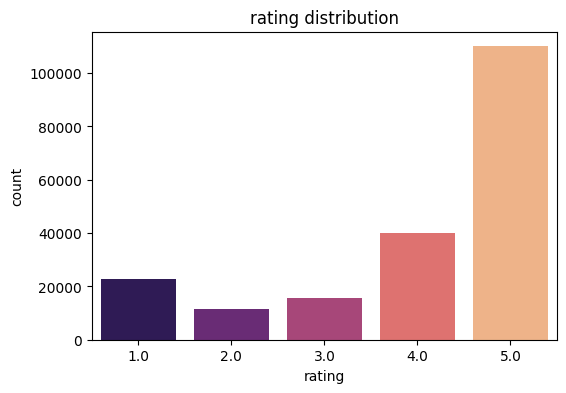

In [21]:
# rating distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='rating',palette='magma')
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

C:\Users\anshs\AppData\Local\Temp\ipykernel_7692\948485554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values,y=top_products.index,palette='magma')


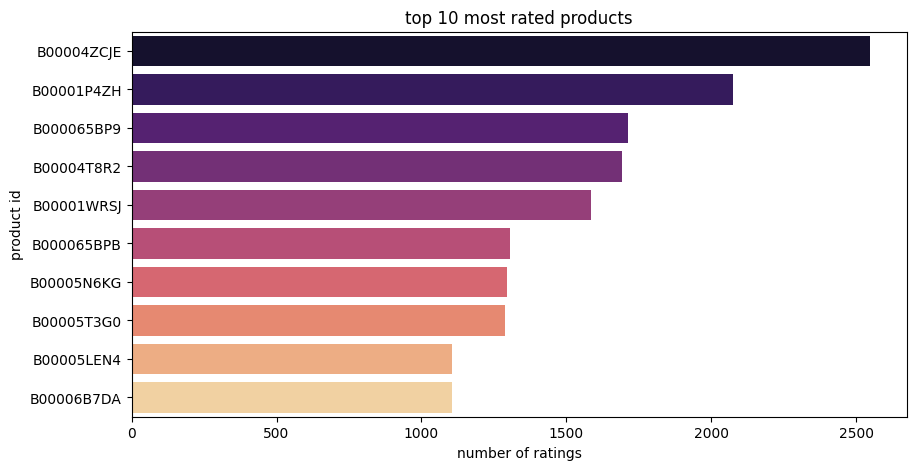

In [24]:
# most rated products 

top_products = df['product_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values,y=top_products.index,palette='magma')
plt.title('top 10 most rated products')
plt.xlabel('number of ratings')
plt.ylabel('product id')
plt.show()


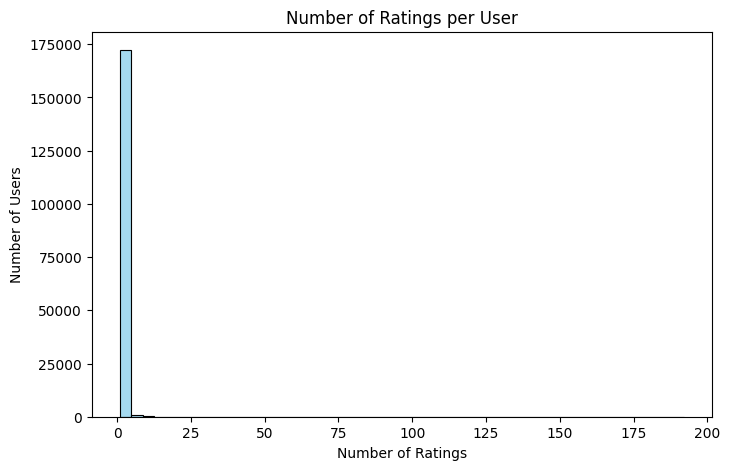

In [36]:
# rating per user distribution

rating_per_user = df.groupby('user_id').size()

plt.figure(figsize=(8,5))
sns.histplot(rating_per_user, bins=50, log_scale=(False, False), color='skyblue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

In [39]:
# data filtering 
# removing the users who rated less than 3 products 
# and removing the products with less than rating of 5 

user_counts = df['user_id'].value_counts()
df=df[df['user_id'].isin(user_counts[user_counts>=3].index)]


product_counts = df['product_id'].value_counts()
df = df[df['product_id'].isin(product_counts[product_counts>=5].index)]

print("filtered dataset shape:",df.shape)
print("unique users",df['user_id'].nunique())
print("unique products",df['product_id'].nunique())

filtered dataset shape: (11309, 4)
unique users 4080
unique products 962


In [41]:
# popularity based recommendation 

product_stats= df.groupby('product_id').agg({'rating':['mean','count']}).reset_index()

# renaming the columns 
product_stats.columns = ['product_id','avg_rating','rating_count']

top_n = product_stats.sort_values(by='rating_count',ascending=False).head(10)

print(top_n)

     product_id  avg_rating  rating_count
202  B00004SB92    4.430303           165
371  B00004ZCJE    4.275000           160
457  B00005ARK3    3.935185           108
907  B00006HYKM    3.945946            74
836  B00006B7DA    4.246377            69
422  B000056SSM    3.558824            68
516  B00005LEN4    4.764706            68
766  B000067RT6    4.843750            64
619  B00005T3G0    4.730159            63
229  B00004T8R2    4.193548            62


C:\Users\anshs\AppData\Local\Temp\ipykernel_7692\3066311573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_id', data=top_n, palette='coolwarm')


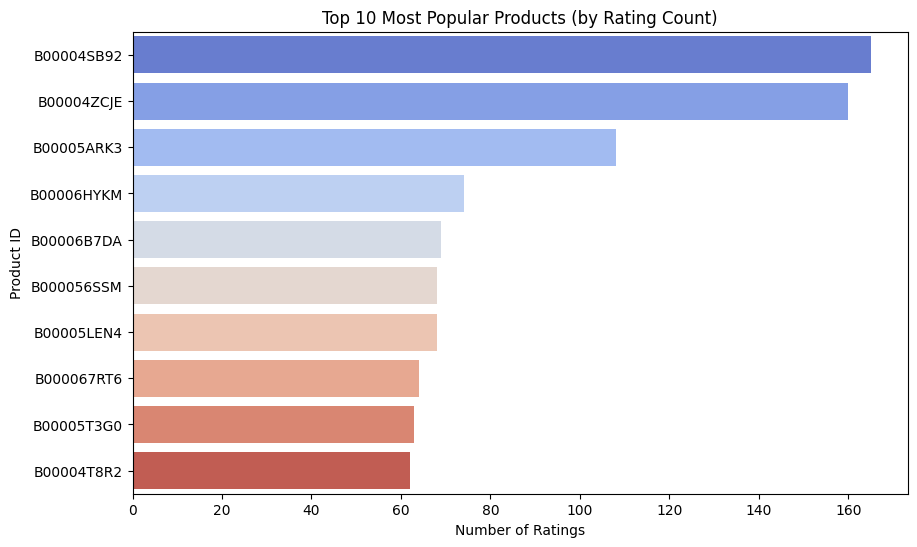

In [42]:

plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='product_id', data=top_n, palette='coolwarm')
plt.title('Top 10 Most Popular Products (by Rating Count)')
plt.xlabel('Number of Ratings')
plt.ylabel('Product ID')
plt.show()
